In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create an object (it's an element in the program):

In [2]:
'''
P0. Implement a list
'''

class LNode:
    def __init__(self,val):
        self.val = val
        self.next = None

In [3]:
# Create a function for decomposing the parameter mode

def parameter_modes(code):
    
    # Add leading zeros to make 5 digits
    c_str = '0'*(5-len(str(code)))+str(code)
    
    return [c_str[0],c_str[1],c_str[2], c_str[3:]]

Create a funciton to run a program:

In [7]:
incom0 = np.fromfile('13_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

In [8]:
len(incom0)

3752

In [89]:
def intcode_call(signal_input, incom, pointer_position=0, relative_base=0, reinitialize = False):
    # Re-read input to reset intcom program
    if reinitialize == True:
        incom = np.fromfile('13_input.txt',sep=",").astype(int)
        
    for j, value in enumerate(incom):
        vars()['node'+str(j)]=LNode(value)

    mem = signal_input

    output = []
    
    rel_base = relative_base
    i = pointer_position

    while i <= len(incom):
        
        #print(i)

        # decode the parameter modes
        p_modes = parameter_modes(vars()['node'+str(i)].val)

        # build instruction

        # retrieve parameters for specific opcode
        if p_modes[-1] in ['99']:
            instr = [99]
            #print('Opcode 99 executed.')
            
            # Prepare incom for return
            incom_out = []
            for j in range(len(incom)):
                incom_out = incom_out + [vars()['node'+str(j)].val]
            #print('program complete')
            
            #output = []
            
            return output, incom_out, i, rel_base
            break
        
        elif p_modes[-1] in ['01', '02', '07', '08']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+4):
                instr += [vars()['node'+str(j)].val]
            i += 4

        elif p_modes[-1] in ['03', '04','09']:
            instr = [int(p_modes[-1])] + [vars()['node'+str(i+1)].val]
            i += 2

        elif p_modes[-1] in ['05', '06']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+3):
                instr += [vars()['node'+str(j)].val]
            i += 3

        else:
            print('Uh oh... intruction not understood')
            break
            
        #print(p_modes)
        #print(instr)


        # Execute instructions
        
        # ADDITION # ==========================================================================
        if instr[0] == 1:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = a+b # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        
        # MULTIPLICATION # =========================================================
        elif instr[0] == 2:
            # define a
            a = instr[1] # default is immediate mode
            #print('immediate mode a = ' + str(a))
            if p_modes[2] == '0': # if parameter is position mode
                #print('position mode a = ' + str(a))
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                #print('relative mode a = ' + str(a))

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = int(a)*int(b) # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        # INPUT # =====================================================================        
        elif instr[0] == 3:
            # write input (mem)
            if p_modes[2] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[1])].val = mem #[0]
                #del mem
            else:
                #print(len(mem))
                vars()['node'+str(instr[1])].val = mem #[0]
                #del mem
        
        
        # OUTPUT # =================================================================
        elif instr[0] == 4:
            # define a
            #print('output parameter mode: ' + str(p_modes[2]) +
            #      ', parameter: ' + str(instr[1]))
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                

            # write to output
            output = output + [a]
            #print('output:', output)

        
        # JUMP IF TRUE # ===========================================================
        elif instr[0] == 5:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                #print('retrieving node ' + str(instr[1]))
                a = vars()['node'+str(instr[1])].val
                #print('a is' + str(a))
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-true. Check for parameter mode 2!")
                break
            else:
                #print('a is' + str(a))
                if a != 0:
                    i = b
                    
                    
        # JUMP IF FALSE # ===========================================================
        elif instr[0] == 6:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                if a == 0:
                    i = b
                    
        # LESS THAN # ==========================================================================
        elif instr[0] == 7:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a < b:
                #print(str(a) + 'is less than' + str(b))
                ab = 1
            else:
                #print(str(a) + 'is NOT less than' + str(b))
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab 
            else:
                #print('setting node ' + str(instr[3]) + 'to be ' + str(ab))
                vars()['node'+str(instr[3])].val = ab 

        # EQUALS # ========================================================================
        elif instr[0] == 8:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a == b:
                ab = 1
            else:
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab
                
        # ADJUST RELATIVE BASE # =============================================================
        elif instr[0] == 9:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # execute: adjust relative base
            if p_modes[1] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[1] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                rel_base += a
                #print('Relative base now:'+str(rel_base))
                

        else:
            print('Instruction not understood!')
            break

    #if i > len(incom):
    #    print('End of input code reached.')
        
    # Repackage the nodes as incom
    incom_out = []
    for j in range(len(incom)):
        incom_out = incom_out + [vars()['node'+str(j)].val]
        
    print('returning at end of intcode')

    return output, incom_out, i, rel_base

Test the intcode:

In [17]:
output, incom, pointer, relative_base = intcode_call(signal_input=[], incom=incom0, pointer_position=0, relative_base=0)

Opcode 99 executed.
program complete


In [18]:
len(output)

3168

Okay, I need to convert the output into an image. I suspect that I should create a block class? Maybe for part two. For now, let's just decode the output into block coords and types and then visualize.

In [19]:
max(output) # find the max coord

43

In [26]:
# We'll define a 25 x 50 pixel screen

screen = np.zeros((25,50))

In [27]:
for i in range(0,len(output),3):
    block = [output[i], output[i+1], output[i+2]]
    screen[block[1], block[0]] = block[2]

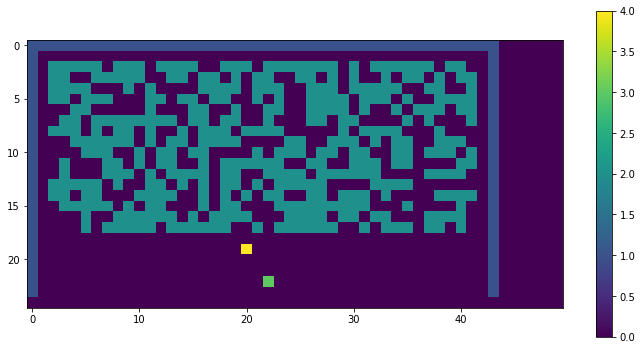

In [79]:
plt.figure(figsize = (12,6))
plt.imshow(screen)
plt.colorbar()

Nice! Now count the blocks:

In [32]:
len(np.where(screen == 2)[0])

376

Part II

In [49]:
# Reload the input

incom0 = np.fromfile('13_input.txt',sep=",").astype(int)

incom0[0] = 2 # the problem specifies that memory address 0 should be set to 2

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

Does each run of this intcode represent a step forward in time?

In [74]:
joystick = 0 # neutral

# first step
output1, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom0, pointer_position=0, relative_base=0)

# second step - resets pointer, relative base
output2, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom, pointer_position=0, relative_base=0)

# third step - resets pointer, relative base
output3, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom, pointer_position=0, relative_base=0)


Opcode 99 executed.
program complete
Opcode 99 executed.
program complete
Opcode 99 executed.
program complete


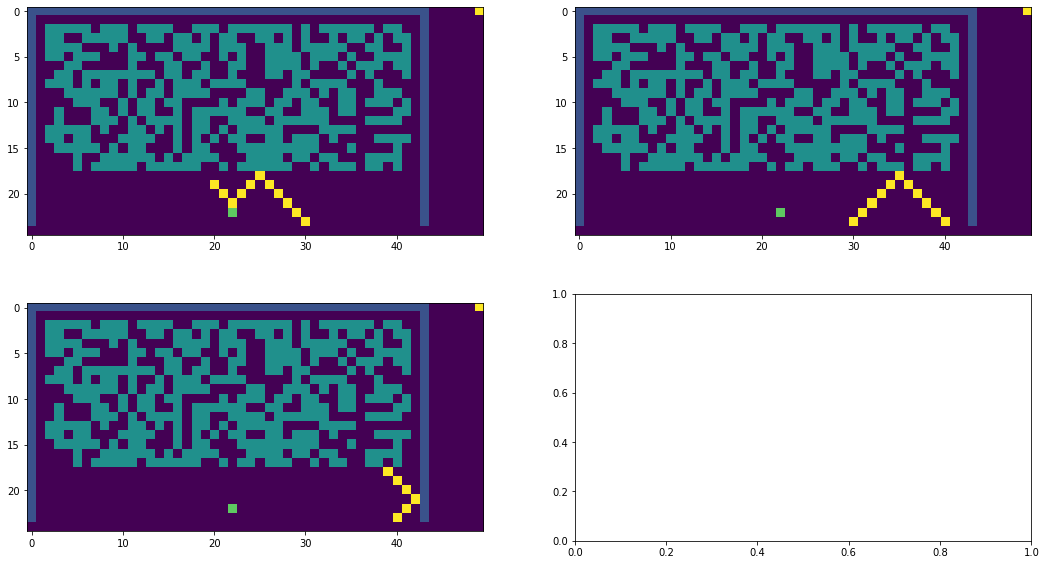

In [77]:
# We'll define a 25 x 50 pixel screen

screen1 = np.zeros((25,50))
screen2 = np.zeros((25,50))
screen3 = np.zeros((25,50))

score1 = []
score2 = []
score3 = []

for i in range(0,len(output1),3):
    block = [output1[i], output1[i+1], output1[i+2]]
    if block[0] == -1 and block[1] == 0:
        score1 += [block[2]]
    if block[2] != 0:
        screen1[block[1], block[0]] = block[2]

for i in range(0,len(output2),3):
    block = [output2[i], output2[i+1], output2[i+2]]
    if block[0] == -1 and block[1] == 0:
        score2 += [block[2]]
    if block[2] != 0:
        screen2[block[1], block[0]] = block[2]
        
for i in range(0,len(output3),3):
    block = [output3[i], output3[i+1], output3[i+2]]
    if block[0] == -1 and block[1] == 0:
        score3 += [block[2]]
    if block[2] != 0:
        screen3[block[1], block[0]] = block[2]
    
# Plot resutls
fig, axes = plt.subplots(2, 2, figsize=(18, 10))#, sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(screen1, vmax=4)
ax[1].imshow(screen2, vmax=4)
ax[2].imshow(screen3, vmax=4)


In [78]:
score1, score2, score3

([0, 21, 0], [21, 73, 0], [73, 74, 0])

Cool! now I can see the trace of the ball.

Since I get free plays, can I just ignore the joystick entries and just let this take care of itself? Try the result of N number of plays:

In [ ]:
joystick = 0 # neutral
output, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom0, pointer_position=0, relative_base=0)
score = []
screen = np.zeros((25,50))

for plays in range(1,100):
    joystick = 0 # neutral
    
    output, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom, pointer_position=0, relative_base=0)
    

Score = [14344, 14351, 0, 14344, 14351, 0]


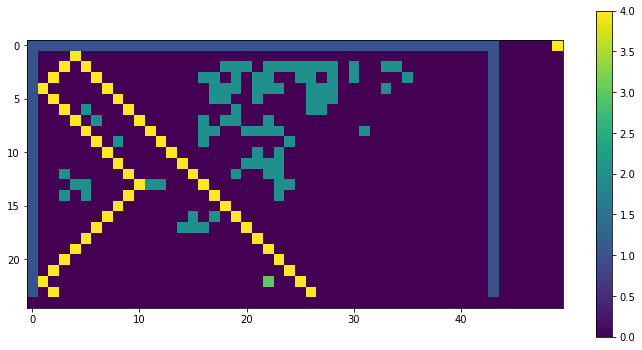

In [85]:
screen = np.zeros((25,50))


# Decode output
for i in range(0,len(output),3):
    block = [output[i], output[i+1], output[i+2]]
    if block[0] == -1 and block[1] == 0:
        score += [block[2]]
    if block[2] != 0:
        screen[block[1], block[0]] = block[2]

print('Score = ' + str(score))

# Visualize
plt.figure(figsize = (12,6))
plt.imshow(screen, vmax=4)
plt.colorbar()

Let's do a bunch more plays:

Score = [18509, 0]


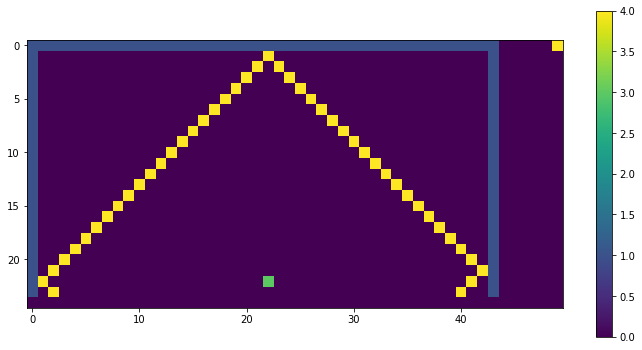

In [90]:
joystick = 0 # neutral
score = []
screen = np.zeros((25,50))

for plays in range(1,300):
    joystick = 0 # neutral
    
    output, incom, pointer, relative_base = intcode_call(signal_input=joystick, incom=incom, pointer_position=0, relative_base=0)

# Decode output
for i in range(0,len(output),3):
    block = [output[i], output[i+1], output[i+2]]
    if block[0] == -1 and block[1] == 0:
        score += [block[2]]
    if block[2] != 0:
        screen[block[1], block[0]] = block[2]

print('Score = ' + str(score))

# Visualize
plt.figure(figsize = (12,6))
plt.imshow(screen, vmax=4)
plt.colorbar()